# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import json

from tqdm import tqdm

In [2]:
PATH1 = '../data/processed/consensus_resolution/disaagreement_resolution_final.csv'
PATH2 = '../data/processed/consensus_resolution/disaagreement_resolution_final_batch_2.csv'

In [3]:
df1 = pd.read_csv(PATH1)
df2 = pd.read_csv(PATH2)

In [4]:
data = pd.concat([df1, df2])

In [5]:
# data = pd.read_csv(PATH)
data.head()

,paper_id,review_pair,accepted_critique_points,rejected_critique_points,final_resolution_summary
0,iclr_2022_jaLDP8Hp_gc,"['0', '1']; ['0', '2']; ['0', '3']; ['0', '4']...","{""Methodology"": [""Enhance the baseline with a ...","{""Methodology"": [""It is unclear what the netwo...",The paper presents a novel and significant adv...
1,iclr_2019_B1xsqj09Fm,"['0', '1']; ['0', '2']; ['1', '2']","{""Methodology"": [""The paper needs a more in-de...",{},After analyzing the critiques and the provided...
2,iclr_2020_BJeXaJHKvB,"['0', '1']; ['0', '2']; ['1', '2']","{""Methodology"": [""The paper does not motivate ...",{},"After analyzing critiques and evidence, it app..."
3,nips_2022_2ge7_pORL_n,"['0', '1']; ['0', '2']; ['0', '3']; ['0', '4']...","{""Methodology"": [""The author should add theore...","{""Methodology"": [], ""Experiments"": [], ""Clarit...","After analyzing critiques and evidence, we con..."
4,iclr_2018_SyVVXngRW,"['0', '1']; ['0', '2']; ['1', '2']","{""Methodology"": [""Matrix B in Eq.(4) and Matri...","{""Methodology"": [], ""Clarity"": [], ""Experiment...",After analyzing the critiques and the supporti...


In [6]:
len(data)

184

# Processing

In [7]:
def parse_combined_critiques(critique_string):
    if critique_string !='{}':
        try:
            critique_dict = ast.literal_eval(critique_string)
            
            json_data = json.dumps(critique_dict, indent=4)
            
            return json.loads(json_data)
        except (SyntaxError, ValueError) as e:
            print(f"Error parsing critique string: {e}")
            return None
    else:
        return "No information available"

In [8]:
tqdm.pandas()
data["parsed_accepted_critique_points"] = data["accepted_critique_points"].progress_apply(lambda x : parse_combined_critiques(x.lower()))

data.head()

100%|██████████| 184/184 [00:00<00:00, 3191.73it/s]


,paper_id,review_pair,accepted_critique_points,rejected_critique_points,final_resolution_summary,parsed_accepted_critique_points
0,iclr_2022_jaLDP8Hp_gc,"['0', '1']; ['0', '2']; ['0', '3']; ['0', '4']...","{""Methodology"": [""Enhance the baseline with a ...","{""Methodology"": [""It is unclear what the netwo...",The paper presents a novel and significant adv...,{'methodology': ['enhance the baseline with a ...
1,iclr_2019_B1xsqj09Fm,"['0', '1']; ['0', '2']; ['1', '2']","{""Methodology"": [""The paper needs a more in-de...",{},After analyzing the critiques and the provided...,{'methodology': ['the paper needs a more in-de...
2,iclr_2020_BJeXaJHKvB,"['0', '1']; ['0', '2']; ['1', '2']","{""Methodology"": [""The paper does not motivate ...",{},"After analyzing critiques and evidence, it app...",{'methodology': ['the paper does not motivate ...
3,nips_2022_2ge7_pORL_n,"['0', '1']; ['0', '2']; ['0', '3']; ['0', '4']...","{""Methodology"": [""The author should add theore...","{""Methodology"": [], ""Experiments"": [], ""Clarit...","After analyzing critiques and evidence, we con...",{'methodology': ['the author should add theore...
4,iclr_2018_SyVVXngRW,"['0', '1']; ['0', '2']; ['1', '2']","{""Methodology"": [""Matrix B in Eq.(4) and Matri...","{""Methodology"": [], ""Clarity"": [], ""Experiment...",After analyzing the critiques and the supporti...,{'methodology': ['matrix b in eq.(4) and matri...


In [9]:
# accepted_critiques = pd.json_normalize(data["parsed_accepted_critique_points"])
accepted_critiques = pd.json_normalize(data["parsed_accepted_critique_points"])
accepted_critiques.drop('experimental results', axis=1, inplace=True)
accepted_critiques.fillna('No information available', inplace=True, axis=0)
accepted_critiques.columns = [x.capitalize() for x in accepted_critiques.columns]
accepted_critiques.head(), len(accepted_critiques)

(                                         Methodology  \
 0  [enhance the baseline with a geometric perspec...   
 1  [the paper needs a more in-depth explanation f...   
 2  [the paper does not motivate this type of regu...   
 3  [the author should add theoretical analysis of...   
 4  [matrix b in eq.(4) and matrix a in eq.(6) are...   
 
                                              Clarity  \
 0  [clarify experiment settings and the output of...   
 1  [the truncation trick should be clarified expl...   
 2  [the statement of theorem 3.1 is unclear. the ...   
 3  [the paper should be better organized with few...   
 4  [the last sentence in page 3 is incomplete., u...   
 
                                          Experiments  \
 0  [show results for identified keypoints in figu...   
 1  [the reviewer's suggestion to provide a compar...   
 2  [empirical results show better performance wit...   
 3  [the proposed method should be validated on mo...   
 4  [in real-world experime

In [10]:
for col in accepted_critiques.columns:
    accepted_critiques[col] = accepted_critiques[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

accepted_critiques.head()

,Methodology,Clarity,Experiments,Significance,Novelty
0,enhance the baseline with a geometric perspect...,clarify experiment settings and the output of ...,show results for identified keypoints in figur...,predicting the locations of invisible points i...,this is an interesting re-formulation of the c...
1,the paper needs a more in-depth explanation fo...,the truncation trick should be clarified expli...,the reviewer's suggestion to provide a compari...,No information available,No information available
2,the paper does not motivate this type of regul...,the statement of theorem 3.1 is unclear. the o...,empirical results show better performance with...,the paper's main contribution (p-bn) lacks suf...,the motivation of novel batch-normalization to...
3,the author should add theoretical analysis of ...,the paper should be better organized with fewe...,the proposed method should be validated on mor...,the paper should justify the significance of t...,the paper should address the claim that the no...
4,matrix b in eq.(4) and matrix a in eq.(6) are ...,"the last sentence in page 3 is incomplete., un...","in real-world experiments, it is better to sho...","the paper conflates the concepts of noisy, unr...",the large similarity with amtl decreases the n...


In [11]:
accepted_critiques.isna().sum(), len(accepted_critiques)

(Methodology     0
 Clarity         0
 Experiments     0
 Significance    0
 Novelty         0
 dtype: int64,
 184)

In [12]:
data.isna().sum()

paper_id                           0
review_pair                        0
accepted_critique_points           0
rejected_critique_points           0
final_resolution_summary           0
parsed_accepted_critique_points    0
dtype: int64

In [13]:
len(data)

184

# Cosine similarity between accepted critiques and final resolution summary

In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [16]:
data['resolution_embedding'] = data["final_resolution_summary"].apply(lambda x: model.encode(x))

In [17]:
for col in tqdm(accepted_critiques.columns):
    accepted_critiques[col+"_embedding"] = accepted_critiques[col].apply(lambda x: model.encode(x))

accepted_critiques.head()

100%|██████████| 5/5 [00:16<00:00,  3.27s/it]


,Methodology,Clarity,Experiments,Significance,Novelty,Methodology_embedding,Clarity_embedding,Experiments_embedding,Significance_embedding,Novelty_embedding
0,enhance the baseline with a geometric perspect...,clarify experiment settings and the output of ...,show results for identified keypoints in figur...,predicting the locations of invisible points i...,this is an interesting re-formulation of the c...,"[0.011620334, -0.0072892136, 0.019308249, -0.0...","[-0.03454288, 0.06185727, 0.024506941, -0.0440...","[-0.0144913895, 0.022496052, 0.004152332, -0.1...","[-0.049092423, -0.019951066, -0.015389602, 0.0...","[-0.0077338987, -0.05200557, 0.046109043, -0.0..."
1,the paper needs a more in-depth explanation fo...,the truncation trick should be clarified expli...,the reviewer's suggestion to provide a compari...,No information available,No information available,"[0.024785478, -0.11464674, 0.10807599, 0.01338...","[-0.00033530119, -0.0067923698, 0.0024753637, ...","[-0.02075755, 0.01937924, 0.048022848, 0.03956...","[0.06948577, 0.06287911, -0.09167679, 0.053955...","[0.06948577, 0.06287911, -0.09167679, 0.053955..."
2,the paper does not motivate this type of regul...,the statement of theorem 3.1 is unclear. the o...,empirical results show better performance with...,the paper's main contribution (p-bn) lacks suf...,the motivation of novel batch-normalization to...,"[-0.061776962, -0.031143382, 0.054678757, 0.01...","[-0.16190673, -0.052369185, 0.06449792, 0.0754...","[-0.055992596, -0.09821296, 0.077193014, 0.036...","[-0.17830966, -0.014529404, 0.00031744523, 0.0...","[-0.10958735, -0.05511848, 0.019188466, 0.0202..."
3,the author should add theoretical analysis of ...,the paper should be better organized with fewe...,the proposed method should be validated on mor...,the paper should justify the significance of t...,the paper should address the claim that the no...,"[0.0016772924, -0.0835788, 0.02815853, -0.0570...","[-0.052431066, 0.02830422, 0.028006561, -0.094...","[-0.061880674, -0.084910594, 0.026989143, 0.02...","[0.0032035292, -0.030607339, -0.044913363, -0....","[-0.056878712, -0.055767216, 0.05377188, -0.02..."
4,matrix b in eq.(4) and matrix a in eq.(6) are ...,"the last sentence in page 3 is incomplete., un...","in real-world experiments, it is better to sho...","the paper conflates the concepts of noisy, unr...",the large similarity with amtl decreases the n...,"[-0.103626974, 0.02560486, -0.061377116, 0.034...","[-0.07959495, -0.012291286, 0.061269283, -0.01...","[-0.09465334, -0.043971457, 0.08735436, 0.0304...","[-0.012464057, -0.053749178, 0.016056316, -0.0...","[-0.072201595, -0.08745384, 0.0173132, -0.0023..."


In [18]:
accepted_critiques.reset_index(inplace=True)
data.reset_index(inplace=True)

In [19]:
accepted_critiques['Resolution_embedding'] = data['resolution_embedding']

In [20]:
similarity_df = pd.DataFrame()

In [21]:
# for section in tqdm(accepted_critiques.columns[:5]):
#     similarity_df[f"{section}_similarity"] = accepted_critiques.apply(
#         lambda row: cosine_similarity(
#             np.array(data.loc[row, "resolution_embedding"])[0].reshape(1, -1), 
#             np.array(accepted_critiques[f"{section}_embedding"])[].reshape(1, -1)
#         )[0][0], 
#         axis=1
#     )

cols = ['Methodology',	'Clarity',	'Experiments',	'Significance',	'Novelty']
for section in tqdm(cols):
    # print(f"{section}_simila")
    similarity_df[f"{section}_similarity"] = accepted_critiques.apply(
        lambda row: cosine_similarity(
            [row[f"{section}_embedding"]], 
            [row["Resolution_embedding"]]
        )[0][0], axis=1
    )

100%|██████████| 5/5 [00:00<00:00,  5.93it/s]


In [22]:
similarity_df.head()

,Methodology_similarity,Clarity_similarity,Experiments_similarity,Significance_similarity,Novelty_similarity
0,0.666091,0.597443,0.629907,0.594018,0.566479
1,0.295922,0.572634,0.390641,-0.070932,-0.070932
2,0.392414,0.467071,0.533585,0.364765,0.322470
3,0.328610,0.137848,0.378146,0.423705,0.088314
4,0.464559,0.315551,0.358265,0.225800,0.268091


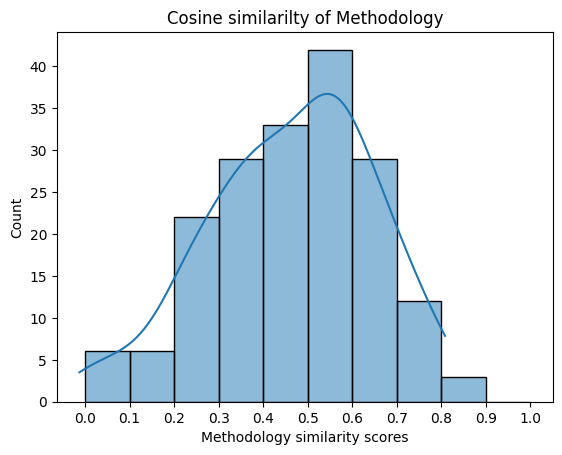

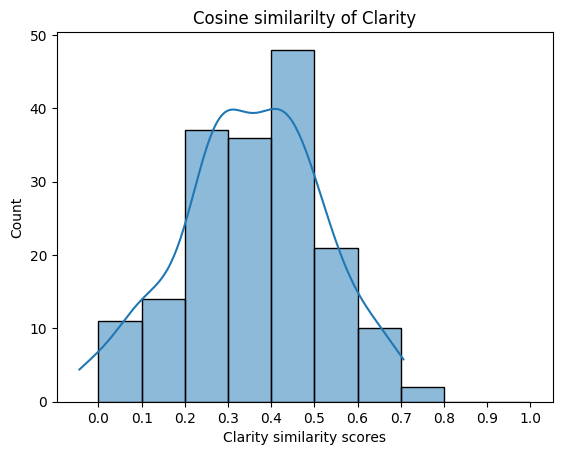

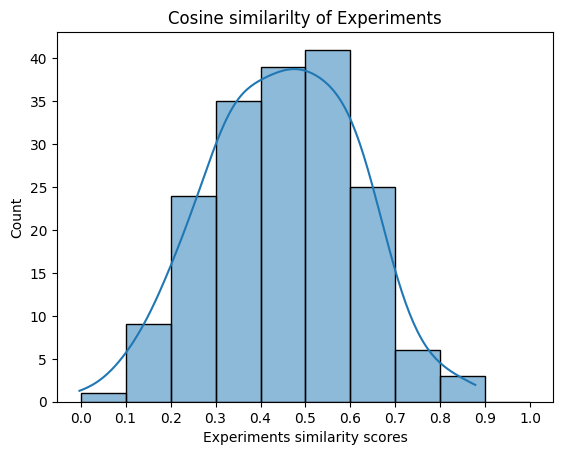

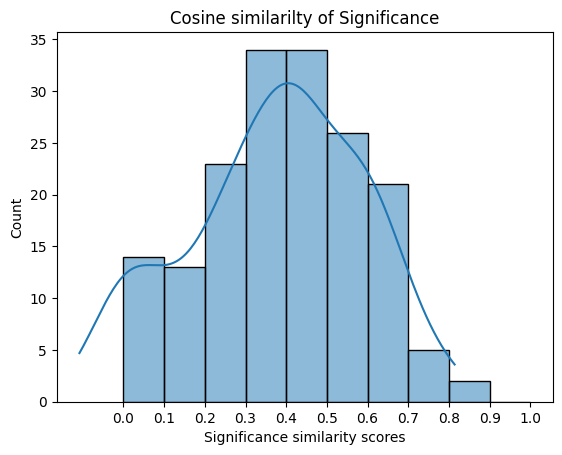

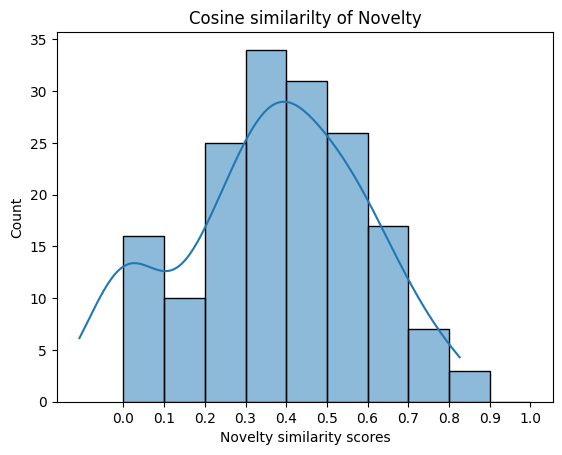

In [23]:
for col in similarity_df.columns:
    sns.histplot(data=similarity_df, x=col, kde=True, bins=10, binrange=(0, 1))
    plt.title(f'Cosine similarilty of {col.split("_")[0]}')
    plt.xticks(np.arange(0, 1.01, 0.1))
    plt.xlabel(f"{col.split('_')[0]} similarity scores")
    plt.show()

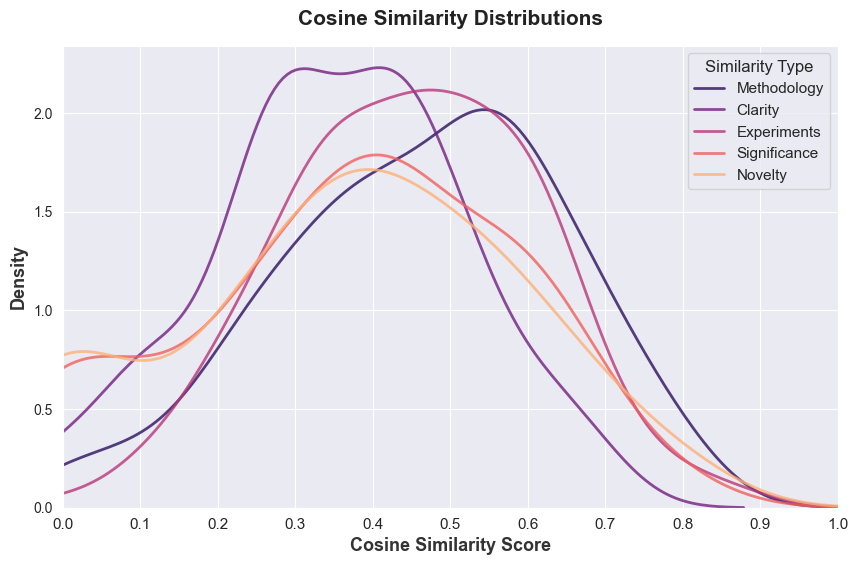

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Define a color palette
colors = sns.color_palette("magma", len(similarity_df.columns))

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each column and plot KDE on the same figure
for i, col in enumerate(similarity_df.columns):
    sns.kdeplot(similarity_df[col], color=colors[i], linewidth=2, label=col.split("_")[0], alpha=0.8)

# Formatting labels and title
plt.title("Cosine Similarity Distributions", fontsize=15, fontweight="bold", color="#222222", pad=15)
plt.xlabel("Cosine Similarity Score", fontsize=13, fontweight="bold", color="#333333")
plt.ylabel("Density", fontsize=13, fontweight="bold", color="#333333")

# Customize x-ticks
plt.xticks(np.arange(0, 1.01, 0.1), fontsize=11)
plt.xlim(0, 1)  # Ensure limits are always 0 to 1

# Add a legend
plt.legend(title="Similarity Type", fontsize=11, title_fontsize=12)

# Show the plot
plt.show()

# Analysis

### Accepted Critiques vs Final resolution summary (Combined KDE Plot)
Final resolution summary is moderately matching with accepted critiques (sub columns)